In [1]:
using Plots, Interact, DifferentialEquations, BifurcationKit, Setfield, ForwardDiff
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

En esta notebook vamos a estudiar analizar tres sistemas dinámicos, analizar sus puntos fijos y estabilidad y posibles bifurcaciones.

# Bifurcación de Hopf en Modelo de Predador Presa

Vamos a ver un ejemplo de sistema que sufre una bifurcación de Hopf supercrítica y da origen a autooscilaciones. Se trata de un modelo poblacional de dos especies, una que preda a la otra. A diferencia del modelo de Lotka-Volterra que no presentaba **estabilidad estructural** en este caso para ciertos valores de parámetros vamos a tener un ciclo límite atractor que va a dar lugar a oscilaciones robustas en ambas poblaciones: si el sistema está oscilando en este ciclo y realizamos una perturbación razonable que no lleve a la extinción luego de un tiempo el sistema vuelve a la misma órbita periódica (y no salta de orbita como pasaba en el LV).

## Descripcion y adimensionalizacion del modelo

Podemos plantear un modelo de Predador-Presa más realista y ver si podemos obtener auto oscilaciones. Para empezar podemos reemplazar el termino de crecimiento exponencial $bx$ de la presa por un crecimiento logistico con una capacidad $K$. Luego en lugar de asumir que el impacto de la predacion en la poblacion de la presa es siempre proporcional al producto de la presa por el predador podemos asumir que satura en un momento determinado (el predador no es insaciable). Si $N$ es la poblacion de la presa y $P$ la del predador la ecuacion para la varicion de la poblacion de la presa seria:

$\dot{N}=RN \displaystyle \left( 1-  \frac{N}{K} \right) - PNf(N)$

Con $f(N)$ una funcion que satura, vamos a tomar una forma simple $f(N) = A/(N+C)$.

Por otro lado podemos suponer simplemente para la poblacion del predador $P$ un crecimiento logistico donde la capacidad es proporcional a la poblacion de la presa con lo cual la segunda ecuacion quedaria:

$\dot{P}=SP\displaystyle \left(1-\frac{P}{BN}\right)$

Tenemos seis parametros ($R,S,K,A,B,C$), pero se pueden reducir si adimensionalizamos las poblaciones: $x=N/K$ $y=P/(BK)$. Al principio las ecuaciones se complican (dividimos la de arriba por $K$ y la de abajo por $BK$):

$\displaystyle\frac{d(N/K)}{dt}=\displaystyle\frac{RN}{K} \displaystyle \left( 1-  \frac{N}{K} \right) - \displaystyle\frac{PAN}{K^2(N/K+C/K)}$

$\displaystyle\frac{d(P/(BK))}{dt}= \displaystyle\frac{SP}{BK}\displaystyle \left(1-\frac{P}{BN}\right)$

reemplazando por la definición de las variables adimensionalizadas, dividiendo ambas ecuaciones por $R$ y reescalando el tiempo por $\tau=tR$:

$\displaystyle\frac{dx}{d\tau}=x\displaystyle \left( 1-  x \right) - \displaystyle\frac{ABxy}{R(x+C/K)}$

$\displaystyle\frac{dy}{d\tau}= \displaystyle\frac{S}{R}y\displaystyle \left(1-\frac{y}{x}\right)$


si redefinimos parametros: $a=AB/R$, $b=S/R$, $c=C/K$ las ecuaciones quedan escritas de una forma mas compacta (ahora la derivada temporal es con respecto a $\tau$).

## Modelo adimensionalizado

El modelo simplificado de las poblaciones adimensionalizadas de presa ($x$) y predador ($y$) queda entonces:

$\dot{x} = x(1-x)-\displaystyle \frac{axy}{x+c}$

$\dot{y} = by\displaystyle \left( 1-\frac{y}{x}\right)$

que depende solo de tres parametros $a,b,c$. La contra es que ahora los parametros son mas dificiles de interpretar. Por ejemplo $b$ representa como es la tasa de crecimiento de la poblacion de predadores **relativa** a la tasa de crecimiento de la poblacion de presas, $c$ esta vinculada a la fraccion de la poblacion maxima de presa a la que satura la predacion, pero $a$ es mas dificil de interpretar ya que crece tanto con la accion de la predacion como con la capacidad de la poblacion de los predadores relativa a la capacidad de la poblacion de la presa.

Para un valor fijo de $a>0.5$ las dos poblaciones llegan a un punto fijo con un mismo valor $x=y$ para valores de $b$ y $c$ altos, pero si esto parametros disminuyen las poblaciones comienzan a oscilar. A diferencia del modelo de Lotka-Volterra, esta oscilacion es estructuralmente estable, todas las trayectorias convergen al **ciclo limite**. 


Si bien las ecuaciones parecen mas complicadas las nulclinas no lo son tanto restringidas al dominio no negativo. Ademas de una nulclina en $y=0$ tenemos la recta $y=x$ para la segunda nulclina (linea diagonal verde) y una cuadratica que sale de la primera ecuacion que puede despejarse como:

$y=(x+c)(1-x)/a$

que es una parabola invertida que corta el eje horizontal en los puntos $x=1$ , $x=-c$ (fuera del dominio), y corta el eje vertical en $y=c/a$

En el dominio tenemos dos puntos fijos:

- donde se corta la parabola con el eje horizontal $x=1$, $y=0$ que es siempre un punto silla (esto se puede ver calculando el Jacobiano que en ese punto fijo tiene determinante igual a $-b$)
- donde se corta la parabola con la diagonal $x=y$ vamos a calcular la ubicacion de es punto fijo que es el que da lugar a la bifurcacion de Hopf


Haciendo $y=x$ en la ecuacion del a nulclina de la parabola y tomando solo la solucion positiva dentro del dominio tenemos:

$x_*  =   \frac{1-a-c}{2} + \sqrt{ \left( \frac{1-a-c}{2} \right)^2 + c}$

aun cuando $1-a-c$ es negativo la raiz es mayor en modulo por lo tanto siempre hay una raiz positiva.

Notar que tanto el punto fijo como las nulclinas no dependen del parametro $b$ sin embargo este si influencia en la estabilidad. 

In [2]:
function predatorprey!(du,u,p,t)
    (a,b,c) = p
    du[1] = u[1]*((1.0-u[1]) - a*u[2]/(c+u[1]))
    du[2] = b*u[2]*(1.0-u[2]/u[1])
    du
end    

predatorprey! (generic function with 1 method)

In [3]:
# Esto es interactivo en ipynb
@manipulate throttle=0.2 for xini=0:0.01:1, yini=0:0.01:1,a=0.01:0.01:2,b=0.01:0.01:1,c=0.01:0.01:1
    flux2d_nullclines(predatorprey!,[xini;yini],200.0,[a,b,c];
        xlims=[0.01,1.0],ylims=[0.01,1.0],title="Modelo Predador Presa")
end   

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000086c389c0, Task (runnable) @0x0000000086c389c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.

## Estabilidad de los puntos fijos [opcional]

Calcular el jacobiano y evaluarlo los puntos fijos puede ser un poco arduo pero fijando $a=1$ y luego de algunas cuentas el Jacobiano queda expresado:

$\begin{pmatrix}1 -2x - \frac{cy}{(x+c)^2} & -\frac{x}{x+c}\\b\frac{y^2}{x^2} & -b\end{pmatrix}$

el punto fijo es ahora 

$x_*  =  \displaystyle -\frac{c}{2} + \sqrt{\displaystyle \frac{c^2}{4}  + c}$

tras un poco de algebra la matriz Jacobiana queda:

$\begin{pmatrix}\frac{c^2}{2}  +\frac{5c}{2}+1-(c+3)\sqrt{\frac{c^2}{4}+c} & \sqrt{\frac{c^2}{4}+c}-\frac{c}{2}-1\\b & -b\end{pmatrix}$


El determinante queda un poco mas simple:

$\Delta = b\left( (c+2)\sqrt{\frac{c^2}{4}+c}-\frac{c^2}{2}- 2c\right)$

que con un poco de trabajo (o graficando) se puede ver que es siempre negativo. 

Mientras que la traza puede ser positiva o negativa y se hace cero cuando (condicion de la bifurcacion de Hopf):

$b=\frac{c^2}{2}+\frac{5}{2}c+1-(c+3)\sqrt{\frac{c^2}{4}+c}$

En la seccion siguiente vamos a ver el significado de esa condicion expresada como $b$ en funcion de $c$ que determina una curva en el espacio de parametros $(b,c)$.

## Espacio de parámetros

Si bien en el modelo anterior tuvimos que mover tres parametros para buscar la bifurcacion de Hopf (probar por ejemplo con $a=1$, $b=0.25$ y bajar el parametro $c$ cruzando el valor $0.1$), en realidad la bifurcacion de Hopf,  al igual que la de nodo-silla, se cruza moviendo un solo parametro ya que es una bifurcación de codimensión 1.

Por ejemplo en el caso anterior podemos fijar $a=1$, $b=0.25$ y buscar la bifurcacion de Hopf usando solo el parametro $c$. En este caso nuestro "espacio de parametros" es 1D. Pero tambien podemos fijar $a$ y $c$ y usar $b$ (queda como ejercicio la otra posibilidad de usar $a$ como parametro de la bifurcacion). 

Que sucede si fijamos $a=1$ y usamos un espacio de parametros 2D formado por los restantes parametros? 

Esto es absolutamente legitimo. En ese caso la bifurcacion de Hopf no ocurre en un punto sino en una curva en el espacio de parámetros ($b,c$), que se puede cruzar en ambas direcciones (es decir no es paralela a uno de los ejes). Este tipo de diagrama de bifurcación es útil porque si bien la bifurcacion puede ser de codimension 1 nos puede interesar como esa bifurcacion depende de dos parametros de control. La curva que derivamos en la seccion anterior como condicion de Hopf (la traza nula con el determinante positivo), corresponde exactamente a esa curva, pero vamos a usar primero el paquete BifurcationKit para calcular numericamente la bifurcacion.

Vamos a estudiar primero la bifurcacion en un espacio de parametros 1D (variando solo $c$) y luego vamos a tratar de esbozar el diagrama en el espacio $(b,c)$

0.09391005816476505

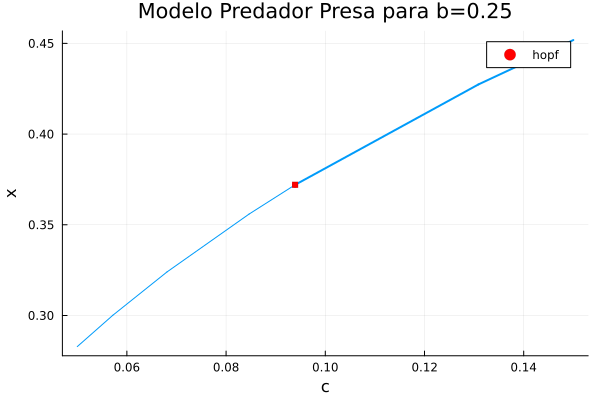

In [4]:
predatorprey(u,p) = predatorprey!(similar(u),u,p,0)
opts = ContinuationPar(pMin=0.05,pMax=0.15, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(predatorprey,[0.3,0.3],[1.0,0.28,0.05],(@lens _[3]), opts)
print(br1.specialpoint[1].param)
plot(br1,xlabel="c",title="Modelo Predador Presa para b=0.25",fmt=:png)

La rama del foco (br) ademas de poder graficarse tiene la información del punto especial hopf. Los puntos especiales que encuentra en la rama los guarda en un array `specialpoint` 

In [5]:
br1.specialpoint[1].param

0.09391005816476505

que en este caso tiene un solo elemento. Ese punto tiene el valor del parametro que se barrio ($c$) para el cual se produce la bifurcacion almacenado en `param`. Por lo tanto ahora podemos barrer el parametro $b$ en un loop y para cada valor de $b$ calculamos la rama igual que antes y extraemos el valor de $c$ que corresponde a la bifurcacion con `br1.specialpoint[1].param`. 

De esta forma podemos armar un array de valores de $c$ (clist) para los cuales el sistema bifurca, en funcion de los valores de $b$ (blist) y eso es una curva en el espacio de parámetros $(b,c)$ que corresponde a la bifurcación de Hopf. Recordar que $a$ esta fijo en el valor 1.

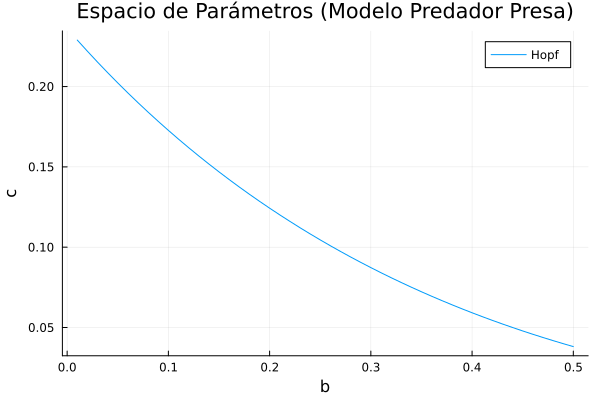

In [6]:
blist = 0.01:0.01:0.5
opts = ContinuationPar(pMin=0.15,pMax=0.25, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(predatorprey,[0.4,0.4],[1.0,blist[1],0.15],(@lens _[3]), opts)
c = br1.specialpoint[1].param
clist = [c]
for n=2:50
    opts = ContinuationPar(pMin=0.8*c,pMax=1.2*c, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
    br1, = continuation(predatorprey,[0.4,0.4],[1.0,blist[n],0.8*c],(@lens _[3]), opts)
    c = br1.specialpoint[1].param
    append!(clist,c)
end    
plot(blist,clist,xlabel="b",ylabel="c",title="Espacio de Parámetros (Modelo Predador Presa)",label="Hopf",fmt=:png)

Anteriormente deducimos una expresión teórica para la curva de Hopf $b=\frac{c^2}{2}+\frac{5}{2}c+1-(c+3)\sqrt{\frac{c^2}{4}+c}$ a partir de igualar a cero la traza del Jacobiano. Podemos comparar el valor teórico de la curva con el resultado numérico de BifurcationKit (BK). En la figura de abajo se muestra la curva teórica como una linea continua y los valores de BK con marcadores azules.

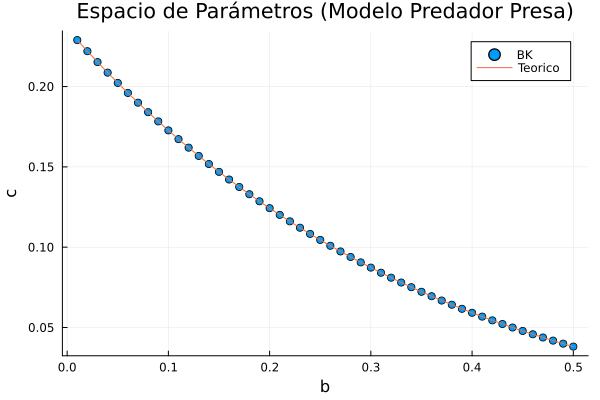

In [7]:
scatter(blist,clist,label="BK")
bteo = @. 0.5*clist^2+2.5*clist+1-(clist+3)*sqrt(abs2(clist)/4+clist)
plot!(bteo,clist,xlabel="b",ylabel="c",title="Espacio de Parámetros (Modelo Predador Presa)",label="Teorico",fmt=:png)

# FitzHugh Nagumo

Otro Auto Oscilador famoso y que funciona como modelo mas simple (continuo) de una neurona biologica es el sistema de FitzHugh-Nagumo que puede escribirse como:

$\dot{x} = x-\Large\frac{x^3}{3}\normalsize-y + I$

$\dot{y} = (ax +b -y)/\mu$

Donde hay dos parametros  ($a$,$b$) que caracterizan la excitabilidad de la neurona, $\mu$ es la diferencia de escala temporal entre el flujo lento/rapido y la vamos a fijar en 10, y una corriente sinaptica externa $I$. El estudio de los puntos fijos y las bifurcaciones queda para la practica. 

Notar que para el caso $a=0$, $b=0$ el sistema se reduce al oscilador de Van der Pol (en la forma de Lienard)

In [8]:
#definimos la Ed para la Neurona de FitzHugh Nagumo
function fhn!(du,u,p,t)
    (a,b,I)=p
    du[1] = u[1]*(1.0-u[1]*u[1]/3.0)-u[2]+I
    du[2] = (a*u[1]+b-u[2])/10.0
    du
end    

fhn! (generic function with 1 method)

In [9]:
@manipulate throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,tmax=10:1:300,a=0.0:0.01:2.0,b=0.0:0.01:1.0,I=0:0.001:1.0
    sol = solve(ODEProblem(fhn!, [xini; yini], (0, tmax), [a,b,I]));
    p1 = plot(sol)
    p2 = plot(sol,idxs=(1,2),arrow=true)
    plot(p1,p2,layout=(1,2),size = (900,450),title="FitzHugh Nagumo")
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000090581180, Task (runnable) @0x0000000090581180), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

In [10]:
@manipulate  throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,tmax=10:1.0:100,a=0.0:0.01:2.0,b=0.0:0.01:1.0,I=0:0.01:2.6
    flux2d_nullclines(fhn!,[xini;yini],tmax,[a,b,I];xlims=[-3,3],ylims=[-2,2],title="FitzHugh Nagumo")
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008b133460, Task (runnable) @0x000000008b133460), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

La nulclina de $\dot{x}$ es la cubica $y=x-x^3/3+ I$ que es tipo N y tiene una forma fija, con pendiente maxima $1$ en $x=0$. El unico efecto del parámetro $I$ es el de subir y bajar la cubica.

La nulclina de $\dot{x}$ es en cambio una recta diagonal $y=ax+b$. De que formas se pueden cortar la cubica y la diagonal? Sabemos que cuando la recta es vertical como en el van del Pol tenemos un solo punto fijo y cuando es horizontal como en el Duffing tenemos uno o tres puntos fijos. En el caso de la recta inclinada, siempre que su inclinacion, que esta dada por el parámetro $a$, sea mayor que la mayor pendiente de la cubica (que en este caso es 1), solo vamos atener un punto fijo (es decir para $a>1$ solo hay un punto fijo), mientras que para pendientes de la recta menores a 1 vamos a poder tener uno o tres puntos fijos dependiendo de los valores de $b$ e $I$.

Esta situación es similar a la del crecimiento logistico con outbreak donde pasabamos de tener una cubica tipo S con un solo punto fijo a una cubica tipo N con la posibilidad de tres, solo que en este caso la cubica no se modifica. Lo cual nos podria hacer sospechar la presencia de una cusp para $a=1$.

POr otra parte el Jacobiano es (recordar que tomamos $\mu=10$):

$\begin{pmatrix}1 -x^2  & -1\\ 0.1 a & -0.1\end{pmatrix}$

El Determinante es 

$\Delta = (x^2-1+a)/10$

Aca ya podemos ver que como $x^2$ es siempre positivo la unica posibilidad de tener el Determinante negativo es que $a$ sea mayor que 1. POr otra parte notar que el punto doble se va a dar cuando $x=0$ y ese punto fijo se da solo cuando $y=b$ y por lo tanto $I=b$. Por lo tanto es de esperar el punto cusp en el espacio de parámetros en $a=1$, $I=b$.

Por otro lado la traza es:

$\tau=0.9-x^2$

que se va a anular cuando $x=\pm \sqrt{0.9}$, es decir se van a producir dos (probables) Hopf en sitios simetricos y fijos. La condicion para la Hopf con los parametros se puede derivar de reemplazar ese valor en las nulclinas. Si fijamos $b$ y usamos la condicion de punto fijo combinando las nulclinas:

$x_*- x_*^3/3-ax_*-b+I=0$

al ser $x_*$ un valor constante, la condición de Hopf se puede escribir como una recta en el espacio de parametros $(a,I)$:

$I = \pm\sqrt{0.9}a+b\mp 0.7\sqrt{0.9}$

que correspoonde a dos rectas de pendiente $\pm\sqrt{0.9}$ que se cortan en $a=0.7$ e $I=b$.

Estas dos diagonales Hopf que se cortan en ($0.7,b$) mas la cusp que arranca en ($1,b$) ya sirve para trazar un diagrama de bifurcaciones en el espacio de fases cualitativo.

[:hopf, :bp, :bp, :hopf]

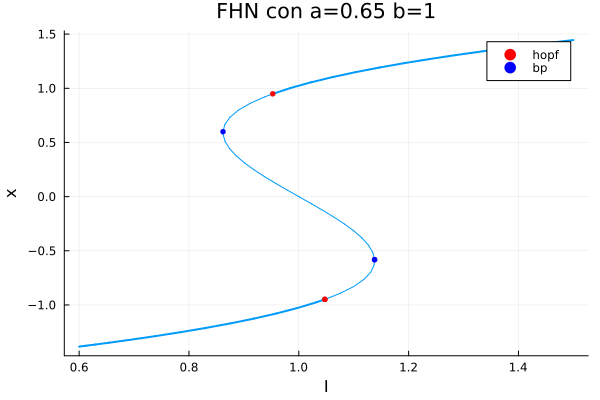

In [11]:
fhn(u,p) = fhn!(similar(u),u,p,0)
opts = ContinuationPar(pMin=0.6, pMax=1.5, ds = 0.01, dsmax = 0.04,detectBifurcation = 3)
FJ = BifurcationKit.getJet(fhn,(z,p) -> ForwardDiff.jacobian(x -> fhn(x,p), z))
br1, = continuation(FJ[1],FJ[2],[-0.9;-0.1],[0.65,1.0,0.6],(@lens _[3]),opts,recordFromSolution = (x, p) -> x[1])
print([pt.type for pt in br1.specialpoint])
plot(br1,xlabel="I",title="FHN con a=0.65 b=1",fmt=:png)

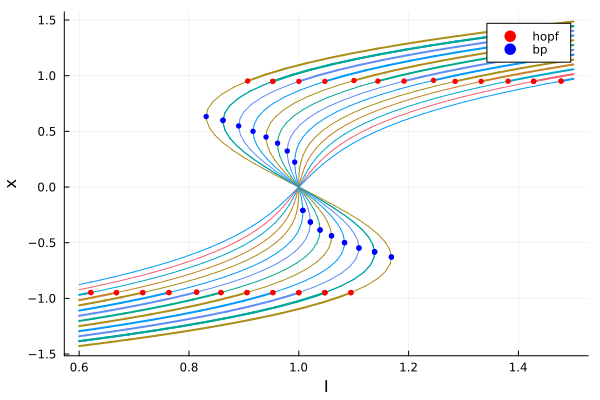

In [12]:
p1=plot(br1)
for a in 0.6:0.05:1.2
    br1, = continuation(FJ[1],FJ[2],[-0.9;-0.1],[a,1.0,0.6],(@lens _[3]),opts,recordFromSolution = (x, p) -> x[1])
    plot!(p1,br1,xlabel="I",label="")
end    
p1

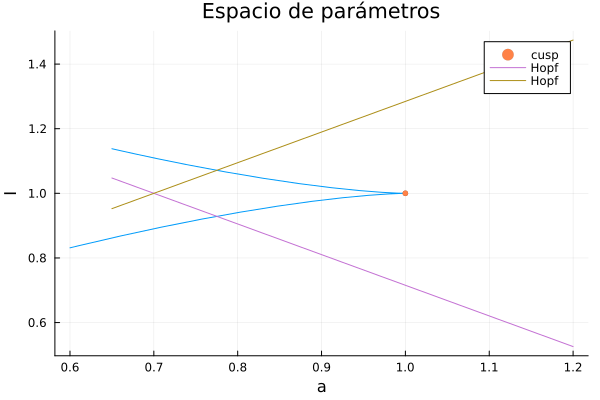

In [13]:
br1, = continuation(FJ[1],FJ[2],[-0.9;-0.1],[0.65,1.0,0.6],(@lens _[3]),opts,recordFromSolution = (x, p) -> x[1])
H1, = continuation(FJ[1],FJ[2],br1,1,(@lens _[1]), ContinuationPar(opts, pMin=0.6,pMax=1.2,ds=0.01); 
    startWithEigen=true,d2F=FJ[3],d3F =FJ[4],updateMinAugEveryStep = 1,bdlinsolver = MatrixBLS())
H2, = continuation(FJ[1],FJ[2],br1,4,(@lens _[1]), ContinuationPar(opts, pMin=0.6,pMax=1.2,ds=0.01); 
    startWithEigen=true,d2F=FJ[3],d3F =FJ[4],updateMinAugEveryStep = 1,bdlinsolver = MatrixBLS())
SN, = continuation(FJ[1],FJ[2],br1,2,(@lens _[1]), ContinuationPar(opts, pMin=0.6,pMax=1.2,ds=0.01); 
    detectCodim2Bifurcation=2,updateMinAugEveryStep = 1,bdlinsolver = MatrixBLS())
plot(SN,title="Espacio de parámetros")
plot!(H1,title="Espacio de parámetros",label="Hopf")
plot!(H2,title="Espacio de parámetros",xaxis=("a"),yaxis=("I"),label="Hopf",fmt=:png)